<a href="https://colab.research.google.com/github/leepopnamoo/SQL-Study/blob/main/Ch7_K_Nearest_Neighbor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***최근접 이웃 분석***

##***데이터 불러오기 및  나누기***

In [1]:
from sklearn.datasets import load_breast_cancer

In [2]:
cancer = load_breast_cancer()

In [3]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state = 42)

In [4]:
print(train_X.shape)

(426, 30)


##***KNN 모델 생성하기***

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3)

In [16]:
knn_model.fit(train_X, train_Y)

KNeighborsClassifier(n_neighbors=3)

##***KNN 모델을 활용한 예측 및 평가***

In [17]:
print("테스트 데이터 예측 결과: {}".format(knn_model.predict(test_X)))

테스트 데이터 예측 결과: [1 0 1 0 1 0 0 0 0 1 1 1 0 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 0 1 0 1 0 1 1 1 0 1 0 1 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1
 1 0 0 0 0 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1 1 0 1 0
 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1]


In [18]:
print("테스트 세트 정확도: {:.2f}".format(knn_model.score(test_X, test_Y)))

테스트 세트 정확도: 0.93


##***KNN 모델의 이웃 수(K) 변화에 따른 정확도 확인***

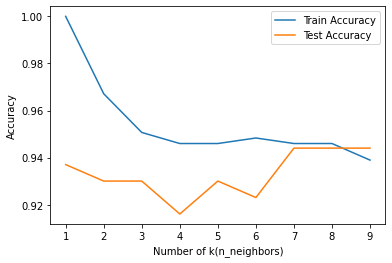

In [20]:
import matplotlib.pyplot as plt
train_accuracy = []
test_accuracy = []
# 이웃 수를 1에서 10까지 적용
neighbors_settings = range(1, 10)

for n_neighbors in neighbors_settings:
    # 모델 생성
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(train_X, train_Y)
    # 훈련 데이터 정확도 저장
    train_accuracy.append(clf.score(train_X, train_Y))
    # 테스트 데이터 정확도 저장
    test_accuracy.append(clf.score(test_X, test_Y))

plt.plot(neighbors_settings, train_accuracy, label="Train Accuracy")
plt.plot(neighbors_settings, test_accuracy, label="Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Number of k(n_neighbors)")
plt.legend()